In [1]:
!pip install xgboost

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from xgboost import XGBRegressor


Do epoch plots

In [4]:
df = pd.read_csv("Restaurant_revenue_new.csv")

In [5]:
df

,Number_of_Customers,Menu_Price,Marketing_Spend,Cuisine_Type,Average_Customer_Spending,Promotions,Reviews,Monthly_Revenue
0,61,43.117635,12.663793,Japanese,36.236133,0,45,350.912040
1,24,40.020077,4.577892,Italian,17.952562,0,36,221.319091
2,81,41.981485,4.652911,Japanese,22.600420,1,91,326.529763
3,70,43.005307,4.416053,Italian,18.984098,1,59,348.190573
4,30,17.456199,3.475052,Italian,12.766143,1,30,185.009121
...,...,...,...,...,...,...,...,...
995,73,41.307842,12.122931,Japanese,19.033585,1,40,249.312034
996,31,20.615496,5.822885,Mexican,17.040990,0,57,110.228767
997,69,17.110656,4.141898,Japanese,44.649315,0,55,312.212552
998,73,37.664722,3.046556,Japanese,27.767358,0,23,272.482204


In [6]:
df.isnull().sum().sort_values()

Number_of_Customers          0
Menu_Price                   0
Marketing_Spend              0
Cuisine_Type                 0
Average_Customer_Spending    0
Promotions                   0
Reviews                      0
Monthly_Revenue              0
dtype: int64

In [7]:
df = df.drop_duplicates()

Text(0, 0.5, 'Monthly_Revenue')

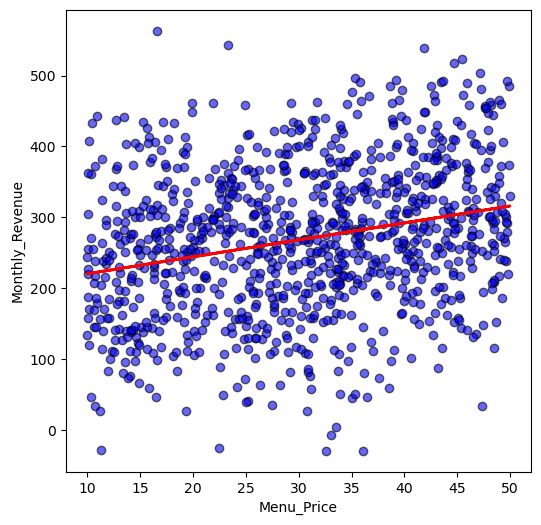

In [8]:
x=df["Menu_Price"]
y=df["Monthly_Revenue"]

plt.figure(figsize=(6,6))
plt.scatter(x, y, color='blue', alpha=0.6, edgecolors='black')

slope, intercept = np.polyfit(x, y, 1) 
y_fit = slope * x + intercept
plt.plot(x, y_fit, color='red', linewidth=2, label="Fitted Line")



plt.xlabel("Menu_Price")
plt.ylabel("Monthly_Revenue")

Text(0, 0.5, 'Monthly_Revenue')

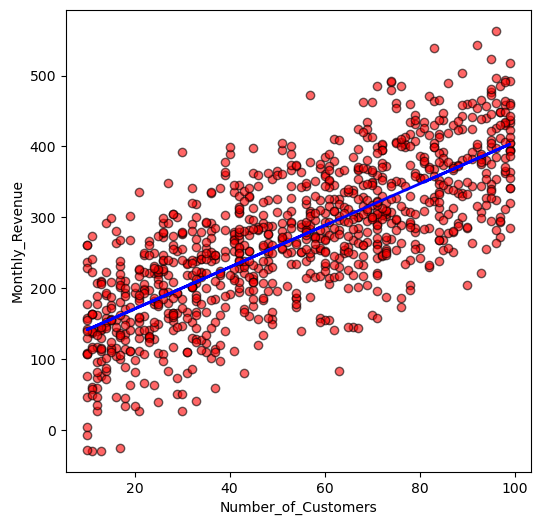

In [9]:
x=df["Number_of_Customers"]
y=df["Monthly_Revenue"]

plt.figure(figsize=(6,6))
plt.scatter(x, y, color='red', alpha=0.6, edgecolors='black')

slope, intercept = np.polyfit(x, y, 1) 
y_fit = slope * x + intercept
plt.plot(x, y_fit, color='blue', linewidth=2, label="Fitted Line")



plt.xlabel("Number_of_Customers")
plt.ylabel("Monthly_Revenue")

Text(0, 0.5, 'Monthly_Revenue')

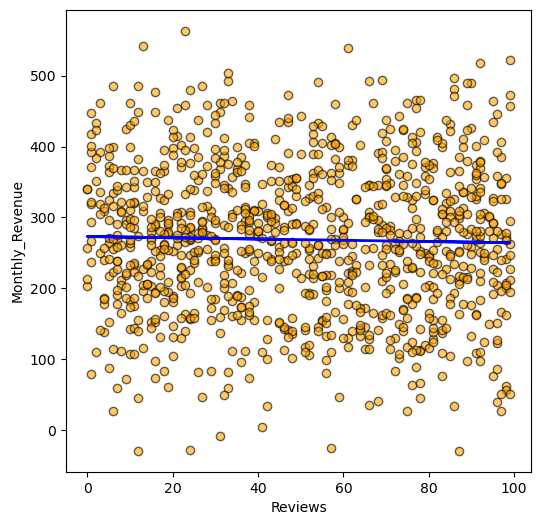

In [10]:
x=df["Reviews"]
y=df["Monthly_Revenue"]

plt.figure(figsize=(6,6))
plt.scatter(x, y, color='orange', alpha=0.6, edgecolors='black')


slope, intercept = np.polyfit(x, y, 1)  
y_fit = slope * x + intercept
plt.plot(x, y_fit, color='blue', linewidth=2, label="Fitted Line")


plt.xlabel("Reviews")
plt.ylabel("Monthly_Revenue")

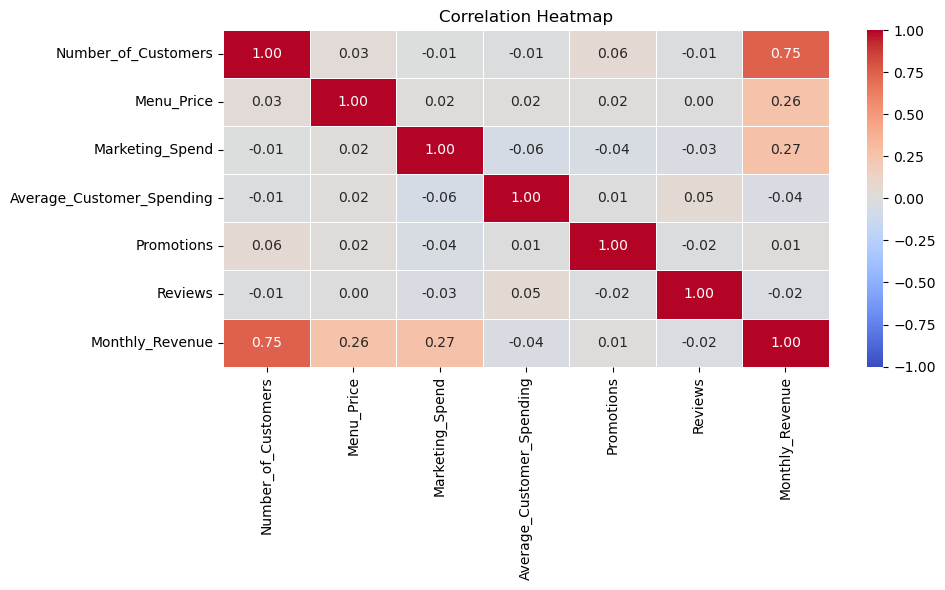

In [11]:
numeric_data = df.drop(columns=['Cuisine_Type'])

correlation_matrix = numeric_data.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1, linewidths=0.5)

plt.title('Correlation Heatmap')

plt.tight_layout()
plt.show()

The feature like Number of customers, Menu price, Marketing_spend has more correlation with revenue than other features. The feature 'Number of customers' has more positive correlation. I have used scatter plot and as well as heatmap to find the best features. Meanwhile the features like Average_Customer_Spending and Reviews has negative correlation. It doesn't affect the monthly rev                        

In [12]:
correlation_matrix = numeric_data.corr()

print(correlation_matrix)

                           Number_of_Customers  Menu_Price  Marketing_Spend  \
Number_of_Customers                   1.000000    0.033470        -0.007024   
Menu_Price                            0.033470    1.000000         0.016319   
Marketing_Spend                      -0.007024    0.016319         1.000000   
Average_Customer_Spending            -0.013898    0.020808        -0.058586   
Promotions                            0.058693    0.022068        -0.041838   
Reviews                              -0.010140    0.003792        -0.031470   
Monthly_Revenue                       0.745239    0.259579         0.269929   

                           Average_Customer_Spending  Promotions   Reviews  \
Number_of_Customers                        -0.013898    0.058693 -0.010140   
Menu_Price                                  0.020808    0.022068  0.003792   
Marketing_Spend                            -0.058586   -0.041838 -0.031470   
Average_Customer_Spending                   1.000000   

In [13]:
unique_names = df['Cuisine_Type'].unique()

In [14]:
unique_names

array(['Japanese', 'Italian', 'American', 'Mexican'], dtype=object)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Number_of_Customers        1000 non-null   int64  
 1   Menu_Price                 1000 non-null   float64
 2   Marketing_Spend            1000 non-null   float64
 3   Cuisine_Type               1000 non-null   object 
 4   Average_Customer_Spending  1000 non-null   float64
 5   Promotions                 1000 non-null   int64  
 6   Reviews                    1000 non-null   int64  
 7   Monthly_Revenue            1000 non-null   float64
dtypes: float64(4), int64(3), object(1)
memory usage: 62.6+ KB


In [16]:
dummies = pd.get_dummies(df['Cuisine_Type'] , drop_first=True)
dummies = dummies.astype(int)
dummies.head()

,Italian,Japanese,Mexican
0,0,1,0
1,1,0,0
2,0,1,0
3,1,0,0
4,1,0,0


In [17]:
df_new = pd.concat([df , dummies], axis = 1)

In [18]:
df_new = df_new.drop("Cuisine_Type", axis=1)


In [19]:
df_new

,Number_of_Customers,Menu_Price,Marketing_Spend,Average_Customer_Spending,Promotions,Reviews,Monthly_Revenue,Italian,Japanese,Mexican
0,61,43.117635,12.663793,36.236133,0,45,350.912040,0,1,0
1,24,40.020077,4.577892,17.952562,0,36,221.319091,1,0,0
2,81,41.981485,4.652911,22.600420,1,91,326.529763,0,1,0
3,70,43.005307,4.416053,18.984098,1,59,348.190573,1,0,0
4,30,17.456199,3.475052,12.766143,1,30,185.009121,1,0,0
...,...,...,...,...,...,...,...,...,...,...
995,73,41.307842,12.122931,19.033585,1,40,249.312034,0,1,0
996,31,20.615496,5.822885,17.040990,0,57,110.228767,0,0,1
997,69,17.110656,4.141898,44.649315,0,55,312.212552,0,1,0
998,73,37.664722,3.046556,27.767358,0,23,272.482204,0,1,0


In [20]:
print(df_new.columns)

Index(['Number_of_Customers', 'Menu_Price', 'Marketing_Spend',
       'Average_Customer_Spending', 'Promotions', 'Reviews', 'Monthly_Revenue',
       'Italian', 'Japanese', 'Mexican'],
      dtype='object')


## Data Splitting

In [21]:
X = df_new.drop(columns=['Monthly_Revenue'])
y = df_new['Monthly_Revenue']

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Models

In [23]:
models = {
    "LinearRegression": Pipeline([
        ('scaler', StandardScaler()),
        ('lin_reg', LinearRegression())
    ]),
    "RandomForest": Pipeline([
        ('ran_forest', RandomForestRegressor(n_estimators=100, random_state=42))
    ]),
    "XGBoost": Pipeline([
        ('xgboost', XGBRegressor(n_estimators=100, random_state=42))
    ])
}

## Model fitting and Model evaluation

In [24]:
predictions_dict = {"Monthly_Revenue": y_test.values}
results = {}


for name, model in models.items():
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    predictions_dict[name] = y_pred
    
    
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    
    results[name] = {"R² Score": r2, "MAE": mae, "MSE": mse, "RMSE": rmse}


results_df = pd.DataFrame(results)
   
predictions_df = pd.DataFrame(predictions_dict)
print("All models predictions along with the target variable")
print(predictions_df)


print("Model Performance Scores:\n")
print(results_df)

All models predictions along with the target variable
     Monthly_Revenue  LinearRegression  RandomForest     XGBoost
0         296.059897        252.654225    248.404761  274.349609
1         233.602843        274.053379    296.773159  311.345764
2         317.786750        318.766096    309.901469  280.484039
3         398.272591        391.821422    327.395522  349.129303
4         299.352893        232.510788    200.136478  244.009018
..               ...               ...           ...         ...
195       325.068430        377.804086    392.660059  409.080414
196       286.278497        301.289203    306.723499  283.402863
197       384.770624        418.436407    416.720607  431.424805
198       323.304237        330.711388    320.503795  319.869141
199       262.568278        337.643327    349.970524  360.467133

[200 rows x 4 columns]
Model Performance Scores:

          LinearRegression  RandomForest      XGBoost
R² Score          0.674063      0.624958     0.542783
MAE    

In [25]:
# lin_reg_pipeline = models["LinearRegression"]
# # Fit the model (if not already done)
# lin_reg_pipeline.fit(X_train, y_train)

# # Get the linear regression object
# lin_reg_model = lin_reg_pipeline.named_steps['lin_reg']

# # Get the coefficients
# coefficients = lin_reg_model.coef_

# # Match them with column names
# org_variables = list(X_train.columns)
# zip_tgtr = list(zip(org_variables, coefficients))
# coeff_df = pd.DataFrame(zip_tgtr, columns=["variables", "coefficients"])
# coeff_df

## Hyperparameter Tuning

In [26]:

param_grid = {
    'ran_forest__n_estimators': [100, 200, 300, 400],   
    'ran_forest__max_depth': [None, 10, 20, 30],           
    'ran_forest__min_samples_split': [2, 5, 10, 14],       
    'ran_forest__min_samples_leaf': [1, 2, 4]
}



grid_search = GridSearchCV(estimator=models["RandomForest"], param_grid=param_grid, 
                           cv=5, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')


grid_search.fit(X_train, y_train)


best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Hyperparameters:", best_params)
print("Best Cross-validation Score (negative MSE):", best_score)


best_rf_model = grid_search.best_estimator_


y_pred_best_rf = best_rf_model.predict(X_test)

Fitting 5 folds for each of 192 candidates, totalling 960 fits
Best Hyperparameters: {'ran_forest__max_depth': None, 'ran_forest__min_samples_leaf': 4, 'ran_forest__min_samples_split': 14, 'ran_forest__n_estimators': 200}
Best Cross-validation Score (negative MSE): -3709.9079981609793


In [27]:
mse = mean_squared_error(y_test, y_pred_best_rf)
rmse = mean_squared_error(y_test, y_pred_best_rf, squared=False) 
mae = mean_absolute_error(y_test, y_pred_best_rf)


r2 = r2_score(y_test, y_pred_best_rf)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R² Score (Accuracy): {r2:.4f}")

Mean Squared Error (MSE): 4063.7904
Root Mean Squared Error (RMSE): 63.7479
Mean Absolute Error (MAE): 51.3347
R² Score (Accuracy): 0.6280


In [28]:
print(models["XGBoost"].get_params())

{'memory': None, 'steps': [('xgboost', XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...))], 'verbose': False, 'xgboost': XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopp

In [29]:
print(models["RandomForest"].get_params())

{'memory': None, 'steps': [('ran_forest', RandomForestRegressor(random_state=42))], 'verbose': False, 'ran_forest': RandomForestRegressor(random_state=42), 'ran_forest__bootstrap': True, 'ran_forest__ccp_alpha': 0.0, 'ran_forest__criterion': 'squared_error', 'ran_forest__max_depth': None, 'ran_forest__max_features': 1.0, 'ran_forest__max_leaf_nodes': None, 'ran_forest__max_samples': None, 'ran_forest__min_impurity_decrease': 0.0, 'ran_forest__min_samples_leaf': 1, 'ran_forest__min_samples_split': 2, 'ran_forest__min_weight_fraction_leaf': 0.0, 'ran_forest__n_estimators': 100, 'ran_forest__n_jobs': None, 'ran_forest__oob_score': False, 'ran_forest__random_state': 42, 'ran_forest__verbose': 0, 'ran_forest__warm_start': False}


In [ ]:
param_grid_xgb = {
    'xgboost__learning_rate': [0.01, 0.05, 0.1, 0.15, 0.2],
    'xgboost__max_depth': [3, 5, 7, 10],
    'xgboost__min_child_weight': [1, 3, 5, 7],
    'xgboost__subsample': [0.6, 0.8, 1.0],
    'xgboost__colsample_bytree': [0.6, 0.8, 1.0],
    'xgboost__gamma': [0, 0.1, 0.2, 0.5],
    'xgboost__lambda': [0, 0.1, 1],
    'xgboost__alpha': [0, 0.1, 1],
    'xgboost__n_estimators': [100, 200, 300, 400],
    'xgboost__scale_pos_weight': [1, 2]  # If your data is imbalanced
}



grid_search_xgb = GridSearchCV(
    estimator=models["XGBoost"], param_grid=param_grid_xgb, scoring='neg_mean_squared_error', 
    cv=5, verbose=1, n_jobs=-1                         
)


grid_search_xgb.fit(X_train, y_train)


print("Best Parameters for XGBoost:", grid_search_xgb.best_params_)
print("Best Score (Negative MSE) for XGBoost:", grid_search_xgb.best_score_)


best_xgb_model = grid_search_xgb.best_estimator_


y_pred_xgb = best_xgb_model.predict(X_test)

Fitting 5 folds for each of 207360 candidates, totalling 1036800 fits


### Before Tuning

In [ ]:
          LinearRegression  RandomForest      XGBoost
R² Score          0.674063      0.624958     0.542783
MAE              47.191936     51.583112    58.069601
MSE            3560.438835   4096.839141  4994.500883
RMSE             59.669413     64.006555    70.671783

### After Tuning XGBoost

In [ ]:
print("R² Score:", r2_score(y_test, y_pred_xgb))
print("MAE:", mean_absolute_error(y_test, y_pred_xgb))
print("MSE:", mean_squared_error(y_test, y_pred_xgb))
print("RMSE:", mean_squared_error(y_test, y_pred_xgb, squared=False))

### After Tuning Random Forest

In [ ]:
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R² Score (Accuracy): {r2:.4f}")